In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
file_path="/Users/joannaborowa/Desktop/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df=pd.read_csv(file_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
features = ['gender','SeniorCitizen', 'Partner',
       'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
        'PaperlessBilling','PaymentMethod',]

In [4]:
df = pd.get_dummies(df, columns=features, drop_first=True)
# Creating a new 0-1 y variable
df['Churn'][df['Churn'] == 'Yes'] = 1
df['Churn'][df['Churn'] == 'No'] = 0

/var/folders/7h/_q8280k96s9cyp_l8vczlx340000gn/T/ipykernel_19117/146292273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'][df['Churn'] == 'Yes'] = 1
/var/folders/7h/_q8280k96s9cyp_l8vczlx340000gn/T/ipykernel_19117/146292273.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'][df['Churn'] == 'No'] = 0


In [5]:
df = df[df["TotalCharges"] != " "]
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="ignore")

In [6]:
df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,34,56.95,1889.50,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,45,42.30,1840.75,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,2,70.70,151.65,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [7]:
df.columns

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

Logistic Regression

feature importance

In [8]:
X= df.drop(["customerID","Churn"],axis=1).values
y=df["Churn"].values
y=y.astype('int')

In [9]:
# Packages / libraries
import os #provides functions for interacting with the operating system
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=44, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=44)

In [10]:
# Running Feature Importance

fi_col = []
fi = []

for i,column in enumerate(df.drop(['Churn','customerID'], axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for tenure is : 0.13340364692731754
The feature importance for MonthlyCharges is : 0.13450939087238048
The feature importance for TotalCharges is : 0.11796556712867413
The feature importance for gender_Male is : 0.011380566465957281
The feature importance for SeniorCitizen_1 is : 0.012394134210503277
The feature importance for Partner_Yes is : 0.005525424121361123
The feature importance for Dependents_Yes is : 0.012895815932296516
The feature importance for PhoneService_Yes is : 0.006678697781306509
The feature importance for MultipleLines_No phone service is : 0.0
The feature importance for MultipleLines_Yes is : 0.013790472271852932
The feature importance for InternetService_Fiber optic is : 0.07284128997806487
The feature importance for InternetService_No is : 0.0
The feature importance for OnlineSecurity_No internet service is : 0.0
The feature importance for OnlineSecurity_Yes is : 0.007789645127444095
The feature importance for OnlineBackup_No internet serv

In [11]:
# Creating a Dataframe
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:120]

fi_df

,index,Feature,Feature Importance
0,25,Contract_Two year,0.221953
1,24,Contract_One year,0.139503
2,1,MonthlyCharges,0.134509
3,0,tenure,0.133404
4,2,TotalCharges,0.117966
5,10,InternetService_Fiber optic,0.072841
6,23,StreamingMovies_Yes,0.023247
7,28,PaymentMethod_Electronic check,0.021731
8,26,PaperlessBilling_Yes,0.014669
9,9,MultipleLines_Yes,0.013790


Logistic Regression without scaling and hiperparameters tuning

In [12]:
#data split
from sklearn.model_selection import train_test_split
X= df.drop(["customerID","Churn","MultipleLines_No phone service","InternetService_No","OnlineSecurity_No internet service","OnlineBackup_No internet service","StreamingMovies_No internet service","TechSupport_No internet service"],axis=1).values
y= df["Churn"].values
y=y.astype('int')

X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=44,train_size=0.6,stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, random_state=44,train_size=0.5,stratify=y_val)

In [13]:

log_reg = LogisticRegression(random_state=44, solver = 'liblinear', class_weight='balanced')

log_reg.fit(X_train, y_train)

log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)
pred_proba = log_reg.predict_proba(X_train)



In [14]:
#evaluation on train data

from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Classification Report
print(classification_report(y_train, y_pred))

The Training Accuracy is:  0.7478075373311212
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      3098
           1       0.52      0.80      0.63      1121

    accuracy                           0.75      4219
   macro avg       0.71      0.77      0.72      4219
weighted avg       0.81      0.75      0.76      4219



In [15]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

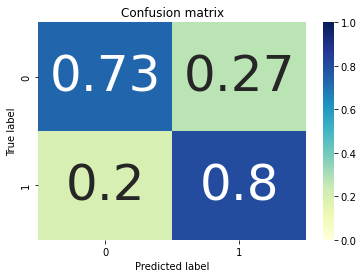

In [16]:
# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [17]:
# Running Log loss on training
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))

The Log Loss on Training is:  0.4904069453494521


Random (chance) Prediction: AUROC = 0.500
Logistic regression: AUROC = 0.845


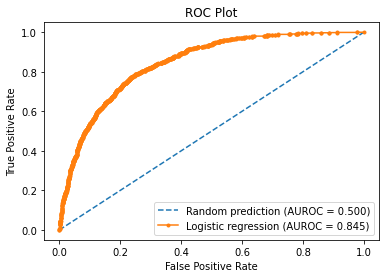

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

l_probs = [0 for _ in range(len(y_train))]
lg_probs = log_reg.predict_proba(X_train)
lg_probs = lg_probs[:, 1]
l_auc = roc_auc_score(y_train, l_probs)
lg_auc = roc_auc_score(y_train, lg_probs)
print('Random (chance) Prediction: AUROC = %.3f' % (l_auc))
print('Logistic regression: AUROC = %.3f' % (lg_auc))
l_fpr, l_tpr, _ = roc_curve(y_train, l_probs)
lg_fpr, lg_tpr, _ = roc_curve(y_train, lg_probs)
plt.plot(l_fpr, l_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % l_auc)
plt.plot(lg_fpr, lg_tpr, marker='.', label='Logistic regression (AUROC = %0.3f)' % lg_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [19]:
y_val_pred = log_reg.predict(X_val)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1032
           1       0.53      0.80      0.64       374

    accuracy                           0.76      1406
   macro avg       0.72      0.77      0.73      1406
weighted avg       0.81      0.76      0.77      1406



Logistic regression with LogisticRegressionCV

In [20]:
# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg1 = LogisticRegression(random_state=44, solver = 'liblinear',class_weight='balanced')
    log_reg1.fit(X_train, y_train)
    score = log_reg1.score(X_val, y_val)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg1.predict_proba(X_val)
    log_loss1 = log_loss(y_val, pred_proba_t)
    Logarithmic_Loss.append(log_loss1)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss1))
    print("")

The CA of C parameter 1e-05 is 0.7588904694167852:
The Logg Loss of C parameter 1e-05 is 0.47388755143667916:

The CA of C parameter 3.359818286283781e-05 is 0.7588904694167852:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.47388755143667916:

The CA of C parameter 0.00011288378916846884 is 0.7588904694167852:
The Logg Loss of C parameter 0.00011288378916846884 is 0.47388755143667916:

The CA of C parameter 0.000379269019073225 is 0.7588904694167852:
The Logg Loss of C parameter 0.000379269019073225 is 0.47388755143667916:

The CA of C parameter 0.0012742749857031334 is 0.7588904694167852:
The Logg Loss of C parameter 0.0012742749857031334 is 0.47388755143667916:

The CA of C parameter 0.004281332398719391 is 0.7588904694167852:
The Logg Loss of C parameter 0.004281332398719391 is 0.47388755143667916:

The CA of C parameter 0.01438449888287663 is 0.7588904694167852:
The Logg Loss of C parameter 0.01438449888287663 is 0.47388755143667916:

The CA of C parameter 0.0483293023857

In [21]:
# putting the outcomes in a Table

# reshaping
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)

# zip
outcomes = zip(C_List, CA2, Logarithmic_Loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2'])

#print
df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()

,index,C_List,CA2,Logarithmic_Loss2
0,0,0.000010,0.75889,0.473888
1,17,8858.667904,0.75889,0.473888
2,16,2636.650899,0.75889,0.473888
3,15,784.759970,0.75889,0.473888
4,14,233.572147,0.75889,0.473888
5,13,69.519280,0.75889,0.473888
6,12,20.691381,0.75889,0.473888
7,11,6.158482,0.75889,0.473888
8,10,1.832981,0.75889,0.473888
9,9,0.545559,0.75889,0.473888


In [23]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=44, shuffle=True)

# Logistic Reg CV
Log_reg1 = LogisticRegressionCV(random_state=44, Cs = C_List, solver ='liblinear', class_weight='balanced')
Log_reg1.fit(X_train, y_train)
print("The CA is:", Log_reg1.score(X_train, y_train))
pred_proba_t = Log_reg1.predict_proba(X_val)
log_loss1 = log_loss(y_val, pred_proba_t)
print("The Logistic Loss is: ", log_loss1)

print("The optimal C parameter is: ", Log_reg1.C_)

The CA is: 0.7494666982697321
The Logistic Loss is:  0.4737572254822315
The optimal C parameter is:  [0.0483293]


In [24]:
y_val_pred = log_reg1.predict(X_val)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1032
           1       0.53      0.80      0.64       374

    accuracy                           0.76      1406
   macro avg       0.72      0.77      0.73      1406
weighted avg       0.81      0.76      0.77      1406



Logistic regression with feature importance and scaling

In [25]:
#scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_val_scaled = ss.transform(X_val)

In [26]:
log_reg2 = LogisticRegression(random_state=44, solver = 'liblinear', class_weight='balanced')

log_reg2.fit(X_train_scaled, y_train)

log_reg2.predict(X_train_scaled)
y_pred = log_reg.predict(X_train_scaled)
pred_proba = log_reg.predict_proba(X_train_scaled)

In [27]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg2.score(X_train_scaled, y_train))

# Classification Report
print(classification_report(y_train, y_pred))

The Training Accuracy is:  0.7437781464802086
              precision    recall  f1-score   support

           0       0.94      0.53      0.68      3098
           1       0.41      0.91      0.57      1121

    accuracy                           0.63      4219
   macro avg       0.68      0.72      0.62      4219
weighted avg       0.80      0.63      0.65      4219



In [28]:
y_val_pred = log_reg2.predict(X_val)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.37      0.05      0.09      1032
           1       0.22      0.75      0.35       374

    accuracy                           0.24      1406
   macro avg       0.30      0.40      0.22      1406
weighted avg       0.33      0.24      0.16      1406



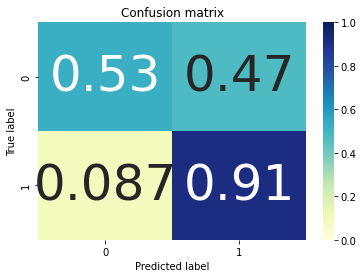

In [29]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

Random (chance) Prediction: AUROC = 0.500
Logistic regression: AUROC = 0.846


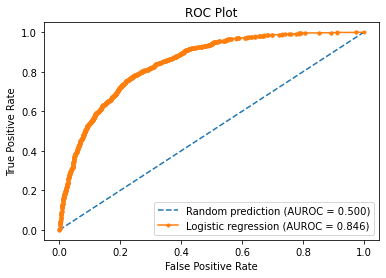

In [30]:
l_probs = [0 for _ in range(len(y_train))]
lg_probs = log_reg2.predict_proba(X_train_scaled)
lg_probs = lg_probs[:, 1]
l_auc = roc_auc_score(y_train, l_probs)
lg_auc = roc_auc_score(y_train, lg_probs)
print('Random (chance) Prediction: AUROC = %.3f' % (l_auc))
print('Logistic regression: AUROC = %.3f' % (lg_auc))
l_fpr, l_tpr, _ = roc_curve(y_train, l_probs)
lg_fpr, lg_tpr, _ = roc_curve(y_train, lg_probs)
plt.plot(l_fpr, l_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % l_auc)
plt.plot(lg_fpr, lg_tpr, marker='.', label='Logistic regression (AUROC = %0.3f)' % lg_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

Make scorer "slytherin score"

In [39]:
from sklearn.metrics import make_scorer

In [40]:
def function(y_true, y_pred, discount = 0.2):
    
    matrix = confusion_matrix(y_true, y_pred)
    TP = matrix[0][0]
    FP = matrix[0][1]
    FN = matrix[1][0]
    TN = matrix[1][1]
    
    return 1 - (FN + discount*FP)/(TN + discount*TP)

In [41]:
slytherin_score = make_scorer(function)

In [43]:
SS = slytherin_score(log_reg1, X_val, y_val)
SS

0.7198941332157036